<a href="https://colab.research.google.com/github/Dhivyaa12/leaf-color-conversion-/blob/main/leaf_color_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 3259.jpg to 3259.jpg


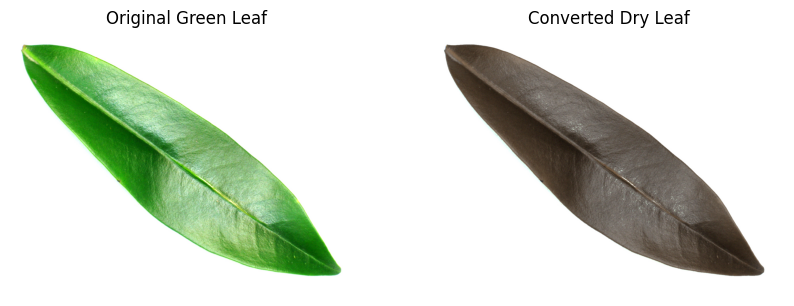

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Function to convert green to dry brown leaf
def convert_green_to_dry_leaf(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)

    # Convert green to dry brown: hue shift + desaturation + darken
    dry_hsv = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)
    dry_hsv[..., 0] = 15                         # Hue → brown/yellow
    dry_hsv[..., 1] = np.clip(dry_hsv[..., 1] * 0.4, 0, 255)  # Desaturate
    dry_hsv[..., 2] = np.clip(dry_hsv[..., 2] * 0.6, 0, 255)  # Darken

    dry_leaf = cv2.cvtColor(dry_hsv, cv2.COLOR_HSV2BGR)

    # Optional: Add small noise to simulate dryness texture
    noise = np.random.randint(0, 20, dry_leaf.shape, dtype='uint8')
    dry_leaf = cv2.subtract(dry_leaf, noise)

    # Combine with original background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, dry_leaf)

    return final_image

# Step 5: Load image and process
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Could not read image.")
else:
    dry_leaf_img = convert_green_to_dry_leaf(image)

    # Convert BGR to RGB for display
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dry_rgb = cv2.cvtColor(dry_leaf_img, cv2.COLOR_BGR2RGB)

    # Show input and dry output
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Green Leaf")
    plt.imshow(orig_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Converted Dry Leaf")
    plt.imshow(dry_rgb)
    plt.axis("off")
    plt.show()

    # Save and download result
    output_filename = "dry_leaf_result.png"
    cv2.imwrite(output_filename, dry_leaf_img)
    files.download(output_filename)


Saving 1188.jpg to 1188 (4).jpg


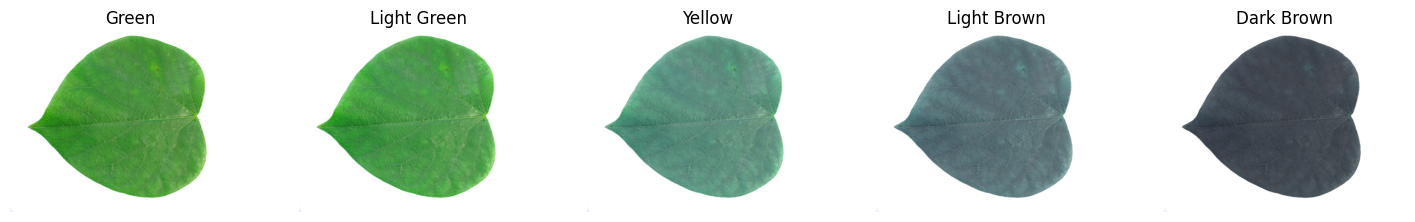

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
import os

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Helper to simulate one stage
def apply_leaf_dry_stage(image, hue_shift, sat_scale, val_scale, noise_strength=0):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Green mask
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green leaf
    leaf_part = cv2.bitwise_and(image, image, mask=mask)

    # Convert to HSV and modify to simulate dryness
    leaf_hsv = cv2.cvtColor(leaf_part, cv2.COLOR_BGR2HSV)
    leaf_hsv[..., 0] = (leaf_hsv[..., 0].astype(np.int32) + hue_shift) % 180
    leaf_hsv[..., 1] = np.clip(leaf_hsv[..., 1].astype(np.float32) * sat_scale, 0, 255).astype(np.uint8)
    leaf_hsv[..., 2] = np.clip(leaf_hsv[..., 2].astype(np.float32) * val_scale, 0, 255).astype(np.uint8)

    # Back to BGR
    dry_leaf = cv2.cvtColor(leaf_hsv, cv2.COLOR_HSV2BGR)

    # Add dryness texture noise
    if noise_strength > 0:
        noise = np.random.randint(0, noise_strength, dry_leaf.shape, dtype='uint8')
        dry_leaf = cv2.subtract(dry_leaf, noise)

    # Combine modified leaf with original background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    return cv2.add(background, dry_leaf)

# Step 5: Load image
image = cv2.imread(filename)
if image is None:
    raise Exception("❌ Could not read the uploaded image.")

# Step 6: Define drying stages (green → dry)
stages = [
    ("Green", 0, 1.0, 1.0, 0),          # Original
    ("Light Green", 5, 0.9, 1.05, 0),
    ("Yellow", 25, 0.6, 1.0, 5),
    ("Light Brown", 40, 0.4, 0.85, 10),
    ("Dark Brown", 50, 0.3, 0.6, 15),
]

# Step 7: Process each stage
output_images = []
for name, hue, sat, val, noise in stages:
    stage_img = apply_leaf_dry_stage(image, hue, sat, val, noise)
    output_images.append((name, stage_img))

# Step 8: Display results
plt.figure(figsize=(18, 4))
for i, (name, img_bgr) in enumerate(output_images):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(output_images), i + 1)
    plt.imshow(img_rgb)
    plt.title(name)
    plt.axis("off")
plt.show()

# Step 9: Save results
os.makedirs("drying_stages", exist_ok=True)
for name, img_bgr in output_images:
    filename_out = f"drying_stages/{name.replace(' ', '_')}.png"
    cv2.imwrite(filename_out, img_bgr)

# Optional: Download one or all
files.download("drying_stages/Dark_Brown.png")  # or zip the folder if needed


Saving 1188.jpg to 1188.jpg


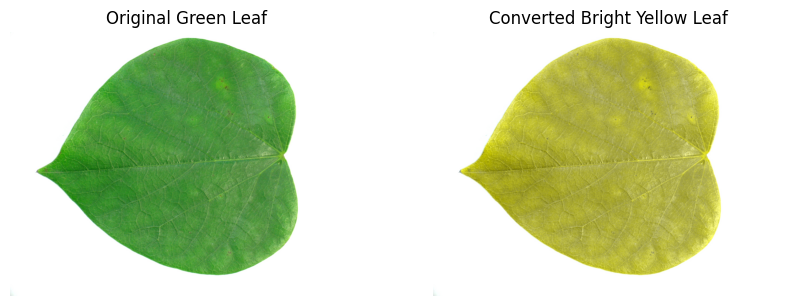

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Function to convert green to bright yellow leaf
def convert_green_to_yellow_leaf(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)

    # Convert green to bright yellow: hue shift + maintain high saturation + brighten
    yellow_hsv = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)
    yellow_hsv[..., 0] = 30                         # Hue for yellow (approx. 25–35)
    yellow_hsv[..., 1] = np.clip(yellow_hsv[..., 1] * 1.1, 0, 255)  # Slight boost in saturation
    yellow_hsv[..., 2] = np.clip(yellow_hsv[..., 2] * 1.2, 0, 255)  # Brighten

    yellow_leaf = cv2.cvtColor(yellow_hsv, cv2.COLOR_HSV2BGR)

    # Combine with original background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, yellow_leaf)

    return final_image

# Step 5: Load image and process
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Could not read image.")
else:
    yellow_leaf_img = convert_green_to_yellow_leaf(image)

    # Convert BGR to RGB for display
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    yellow_rgb = cv2.cvtColor(yellow_leaf_img, cv2.COLOR_BGR2RGB)

    # Show input and yellow output
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Green Leaf")
    plt.imshow(orig_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Converted Bright Yellow Leaf")
    plt.imshow(yellow_rgb)
    plt.axis("off")
    plt.show()

    # Save and download result
    output_filename = "yellow_leaf_result.png"
    cv2.imwrite(output_filename, yellow_leaf_img)
    files.download(output_filename)


Saving 3308.jpg to 3308.jpg


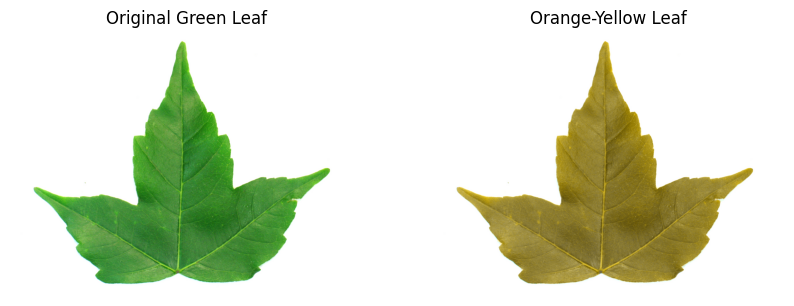

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Function to convert green to orange-yellow (golden) leaf
def convert_green_to_orange_yellow(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)

    # Convert green to orange-yellow: hue shift to 25 (golden), adjust saturation and brightness
    orange_hsv = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)
    orange_hsv[..., 0] = 25                         # Hue → golden/yellow-orange
    orange_hsv[..., 1] = np.clip(orange_hsv[..., 1] * 1.1, 0, 255)  # Slightly more saturated
    orange_hsv[..., 2] = np.clip(orange_hsv[..., 2] * 1.0, 0, 255)  # Keep brightness same

    orange_leaf = cv2.cvtColor(orange_hsv, cv2.COLOR_HSV2BGR)

    # Combine with original background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, orange_leaf)

    return final_image

# Step 5: Load image and process
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Could not read image.")
else:
    orange_leaf_img = convert_green_to_orange_yellow(image)

    # Convert BGR to RGB for display
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    orange_rgb = cv2.cvtColor(orange_leaf_img, cv2.COLOR_BGR2RGB)

    # Show input and orange-yellow output
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Green Leaf")
    plt.imshow(orig_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Orange-Yellow Leaf")
    plt.imshow(orange_rgb)
    plt.axis("off")
    plt.show()

    # Save and download result
    output_filename = "orange_yellow_leaf.png"
    cv2.imwrite(output_filename, orange_leaf_img)
    files.download(output_filename)


Saving 3324.jpg to 3324.jpg


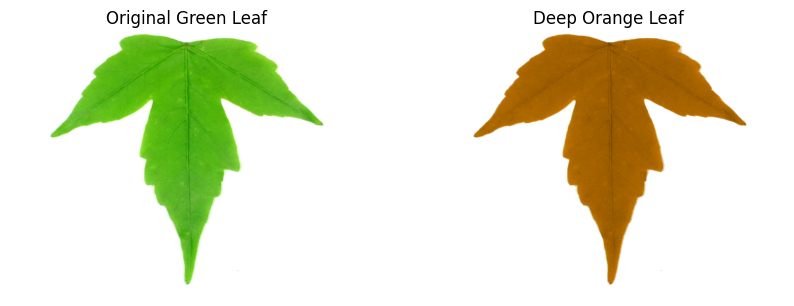

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Function to convert green to deeper orange-yellow leaf
def convert_green_to_deep_orange(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)

    # Shift to deeper orange: lower hue, increase saturation, slightly darken
    orange_hsv = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)
    orange_hsv[..., 0] = 18                          # Hue: deeper orange
    orange_hsv[..., 1] = np.clip(orange_hsv[..., 1] * 1.4, 0, 255)  # More saturated
    orange_hsv[..., 2] = np.clip(orange_hsv[..., 2] * 0.9, 0, 255)  # Slightly darker

    orange_leaf = cv2.cvtColor(orange_hsv, cv2.COLOR_HSV2BGR)

    # Combine with original background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, orange_leaf)

    return final_image

# Step 5: Load image and process
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Could not read image.")
else:
    orange_leaf_img = convert_green_to_deep_orange(image)

    # Convert BGR to RGB for display
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    orange_rgb = cv2.cvtColor(orange_leaf_img, cv2.COLOR_BGR2RGB)

    # Show input and orange output
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Green Leaf")
    plt.imshow(orig_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Deep Orange Leaf")
    plt.imshow(orange_rgb)
    plt.axis("off")
    plt.show()

    # Save and download result
    output_filename = "deep_orange_leaf.png"
    cv2.imwrite(output_filename, orange_leaf_img)
    files.download(output_filename)


Saving 3540.jpg to 3540.jpg


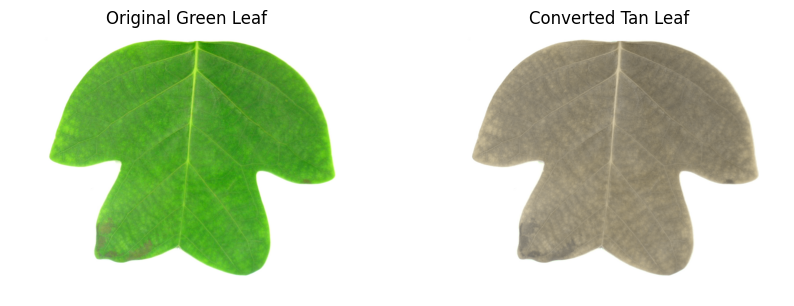

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Function to convert green to tan dry leaf
def convert_green_to_tan_leaf(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)

    # Convert green to tan: adjust hue, reduce saturation, soften brightness
    tan_hsv = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)
    tan_hsv[..., 0] = 22  # Hue ~22: tan
    tan_hsv[..., 1] = np.clip(tan_hsv[..., 1] * 0.3, 0, 255)  # Desaturate
    tan_hsv[..., 2] = np.clip(tan_hsv[..., 2] * 0.9, 0, 255)  # Slightly darken

    tan_leaf = cv2.cvtColor(tan_hsv, cv2.COLOR_HSV2BGR)

    # Combine with original background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, tan_leaf)

    return final_image

# Step 5: Load image and process
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Could not read image.")
else:
    tan_leaf_img = convert_green_to_tan_leaf(image)

    # Convert BGR to RGB for display
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    tan_rgb = cv2.cvtColor(tan_leaf_img, cv2.COLOR_BGR2RGB)

    # Show input and tan output
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Green Leaf")
    plt.imshow(orig_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Converted Tan Leaf")
    plt.imshow(tan_rgb)
    plt.axis("off")
    plt.show()

    # Save and download result
    output_filename = "tan_dry_leaf.png"
    cv2.imwrite(output_filename, tan_leaf_img)
    files.download(output_filename)


Saving 1506.jpg to 1506 (1).jpg


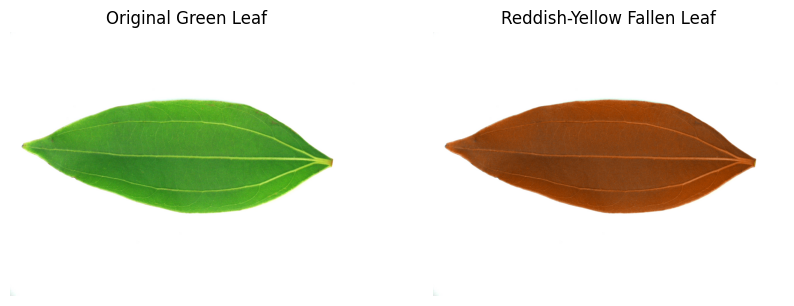

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Function to convert green to reddish-yellow fallen leaf
def convert_green_to_reddish_yellow_leaf(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)

    # Modify to reddish-yellow:
    # Hue ~10-20 (between red and yellow), keep saturation high, slight darkening
    fall_hsv = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)
    fall_hsv[..., 0] = 12                             # Hue for reddish-yellow
    fall_hsv[..., 1] = np.clip(fall_hsv[..., 1] * 1.2, 0, 255)  # Rich saturation
    fall_hsv[..., 2] = np.clip(fall_hsv[..., 2] * 0.9, 0, 255)  # Slightly darker

    fall_leaf = cv2.cvtColor(fall_hsv, cv2.COLOR_HSV2BGR)

    # Combine with original background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, fall_leaf)

    return final_image

# Step 5: Load image and process
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Could not read image.")
else:
    fall_leaf_img = convert_green_to_reddish_yellow_leaf(image)

    # Convert BGR to RGB for display
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fall_rgb = cv2.cvtColor(fall_leaf_img, cv2.COLOR_BGR2RGB)

    # Show input and fallen leaf color output
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Green Leaf")
    plt.imshow(orig_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Reddish-Yellow Fallen Leaf")
    plt.imshow(fall_rgb)
    plt.axis("off")
    plt.show()

    # Save and download result
    output_filename = "reddish_yellow_leaf.png"
    cv2.imwrite(output_filename, fall_leaf_img)
    files.download(output_filename)


Saving 3613.jpg to 3613.jpg


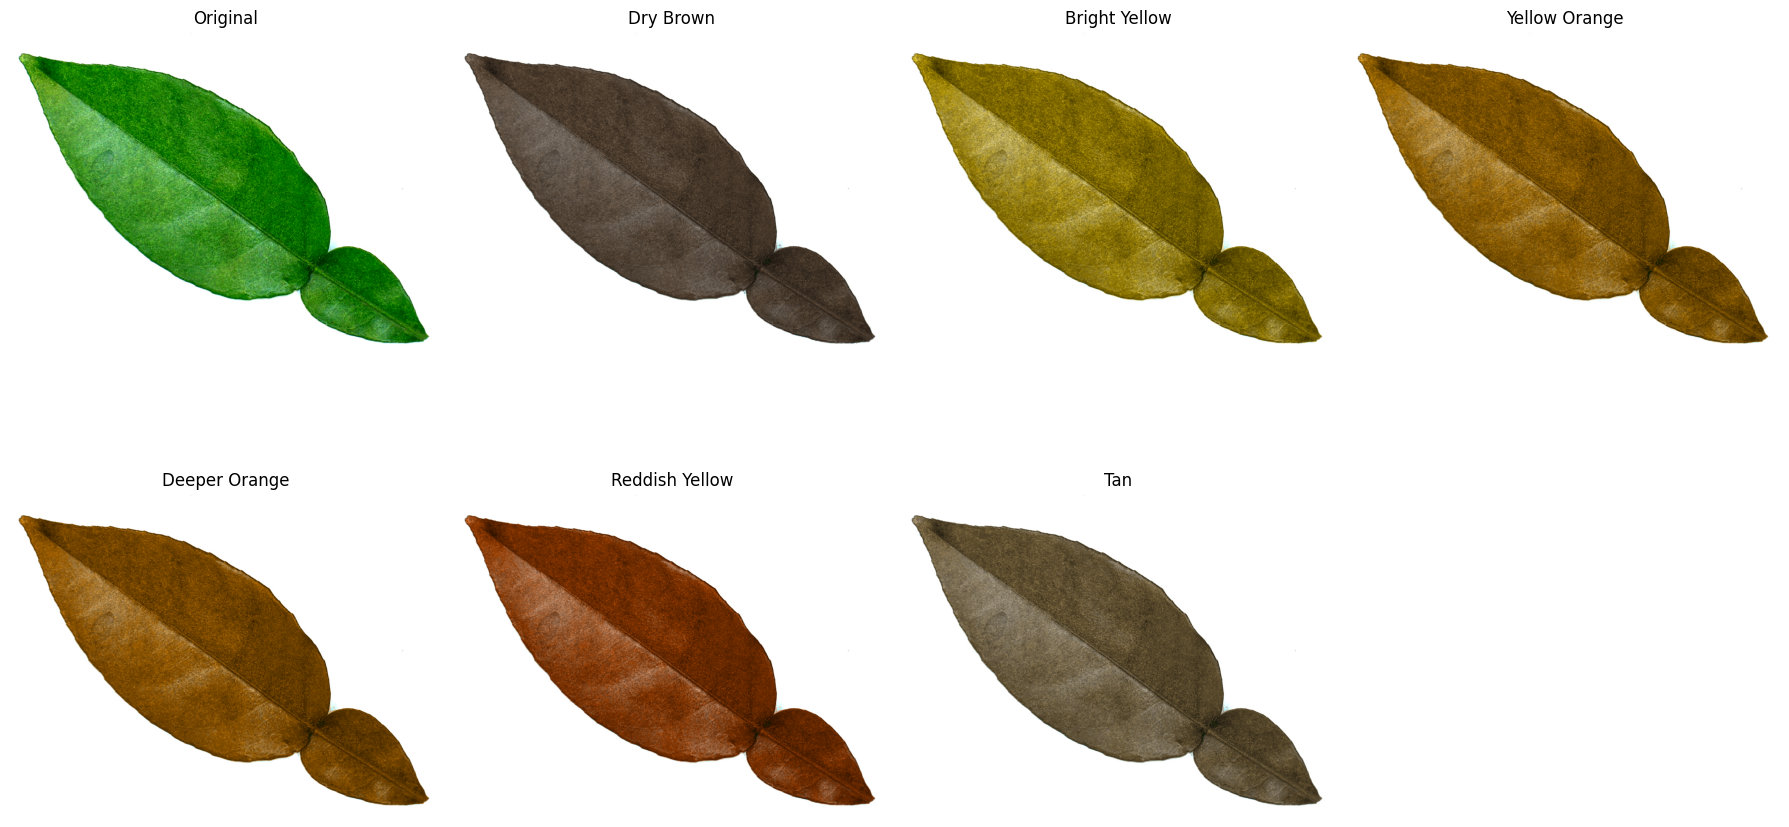

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Leaf stage transformation function
def transform_leaf(image, hue, sat_scale, val_scale, stage_name):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green range
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)
    hsv_leaf = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)

    # Adjust hue, saturation, brightness
    hsv_leaf[..., 0] = hue
    hsv_leaf[..., 1] = np.clip(hsv_leaf[..., 1] * sat_scale, 0, 255)
    hsv_leaf[..., 2] = np.clip(hsv_leaf[..., 2] * val_scale, 0, 255)

    modified_leaf = cv2.cvtColor(hsv_leaf, cv2.COLOR_HSV2BGR)

    # Combine with background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, modified_leaf)

    return final_image

# Step 5: Define color stage parameters
leaf_stages = {
    "Dry Brown":       (15, 0.4, 0.6),
    "Bright Yellow":   (25, 1.2, 1.0),
    "Yellow Orange":   (20, 1.3, 0.95),
    "Deeper Orange":   (18, 1.4, 0.9),
    "Reddish Yellow":  (12, 1.2, 0.9),
    "Tan":             (20, 0.5, 0.75)
}

# Step 6: Process each stage
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Image not read.")
else:
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 10))
    plt.subplot(2, 4, 1)
    plt.title("Original")
    plt.imshow(orig_rgb)
    plt.axis("off")

    for idx, (name, (h, s, v)) in enumerate(leaf_stages.items(), start=2):
        result = transform_leaf(image, hue=h, sat_scale=s, val_scale=v, stage_name=name)
        rgb_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

        # Display
        plt.subplot(2, 4, idx)
        plt.title(name)
        plt.imshow(rgb_result)
        plt.axis("off")

        # Save file
        out_name = f"{name.lower().replace(' ', '_')}_leaf.png"
        cv2.imwrite(out_name, result)

    plt.tight_layout()
    plt.show()

    # Download files
    for name in leaf_stages:
        out_name = f"{name.lower().replace(' ', '_')}_leaf.png"
        files.download(out_name)


In [ ]:
# Step 1: Install required packages
!pip install opencv-python-headless
import cv2, numpy as np, os, zipfile, random
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image

# Step 2: Upload ZIP file containing images
uploaded = files.upload()

# Step 3: Extract the ZIP
zip_filename = list(uploaded.keys())[0]
extract_dir = "images_input"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 4: Leaf stage function (same as before)
def apply_leaf_stage(hsv_area, stage):
    hsv = hsv_area.copy()
    if stage == "bright_yellow":
        hsv[..., 0] = 30
        hsv[..., 1] = np.clip(hsv[..., 1] * 0.9, 0, 255)
        hsv[..., 2] = np.clip(hsv[..., 2] * 1.1, 0, 255)
    elif stage == "orange_yellow":
        hsv[..., 0] = 25
        hsv[..., 1] = np.clip(hsv[..., 1] * 1.1, 0, 255)
        hsv[..., 2] = np.clip(hsv[..., 2] * 1.0, 0, 255)
    elif stage == "deep_orange":
        hsv[..., 0] = 18
        hsv[..., 1] = np.clip(hsv[..., 1] * 1.4, 0, 255)
        hsv[..., 2] = np.clip(hsv[..., 2] * 0.9, 0, 255)
    elif stage == "reddish_yellow":
        hsv[..., 0] = 12
        hsv[..., 1] = np.clip(hsv[..., 1] * 1.2, 0, 255)
        hsv[..., 2] = np.clip(hsv[..., 2] * 1.0, 0, 255)
    elif stage == "tan":
        hsv[..., 0] = 20
        hsv[..., 1] = np.clip(hsv[..., 1] * 0.3, 0, 255)
        hsv[..., 2] = np.clip(hsv[..., 2] * 0.8, 0, 255)
    elif stage == "dry_brown":
        hsv[..., 0] = 15
        hsv[..., 1] = np.clip(hsv[..., 1] * 0.4, 0, 255)
        hsv[..., 2] = np.clip(hsv[..., 2] * 0.6, 0, 255)
    return hsv

def convert_green_to_varied_leaf(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)
    green_hsv = cv2.bitwise_and(hsv, hsv, mask=mask)

    stages = ["bright_yellow", "orange_yellow", "deep_orange", "reddish_yellow", "tan", "dry_brown"]
    stage_map = np.random.choice(stages, size=hsv.shape[:2])

    transformed_hsv = hsv.copy()
    for i in range(hsv.shape[0]):
        for j in range(hsv.shape[1]):
            if mask[i, j] != 0:
                stage = stage_map[i, j]
                pixel_hsv = hsv[i, j].reshape(1, 1, 3)
                transformed_pixel = apply_leaf_stage(pixel_hsv, stage)
                transformed_hsv[i, j] = transformed_pixel[0, 0]

    final_bgr = cv2.cvtColor(transformed_hsv, cv2.COLOR_HSV2BGR)
    green_area_bgr = cv2.bitwise_and(final_bgr, final_bgr, mask=mask)
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(green_area_bgr, background)
    return final_image

# Step 5: Process each image and save
output_dir = "processed_output"
os.makedirs(output_dir, exist_ok=True)

for fname in os.listdir(extract_dir):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(extract_dir, fname)
        image = cv2.imread(img_path)
        if image is not None:
            result = convert_green_to_varied_leaf(image)
            cv2.imwrite(os.path.join(output_dir, f"converted_{fname}"), result)

# Step 6: Zip all output images
zip_output = "converted_leaf_images.zip"
with zipfile.ZipFile(zip_output, 'w') as zipf:
    for root, _, files_ in os.walk(output_dir):
        for file in files_:
            zipf.write(os.path.join(root, file), arcname=file)

# Step 7: Download final ZIP
files.download(zip_output)


KeyboardInterrupt: 

Saving 1188.jpg to 1188 (2).jpg


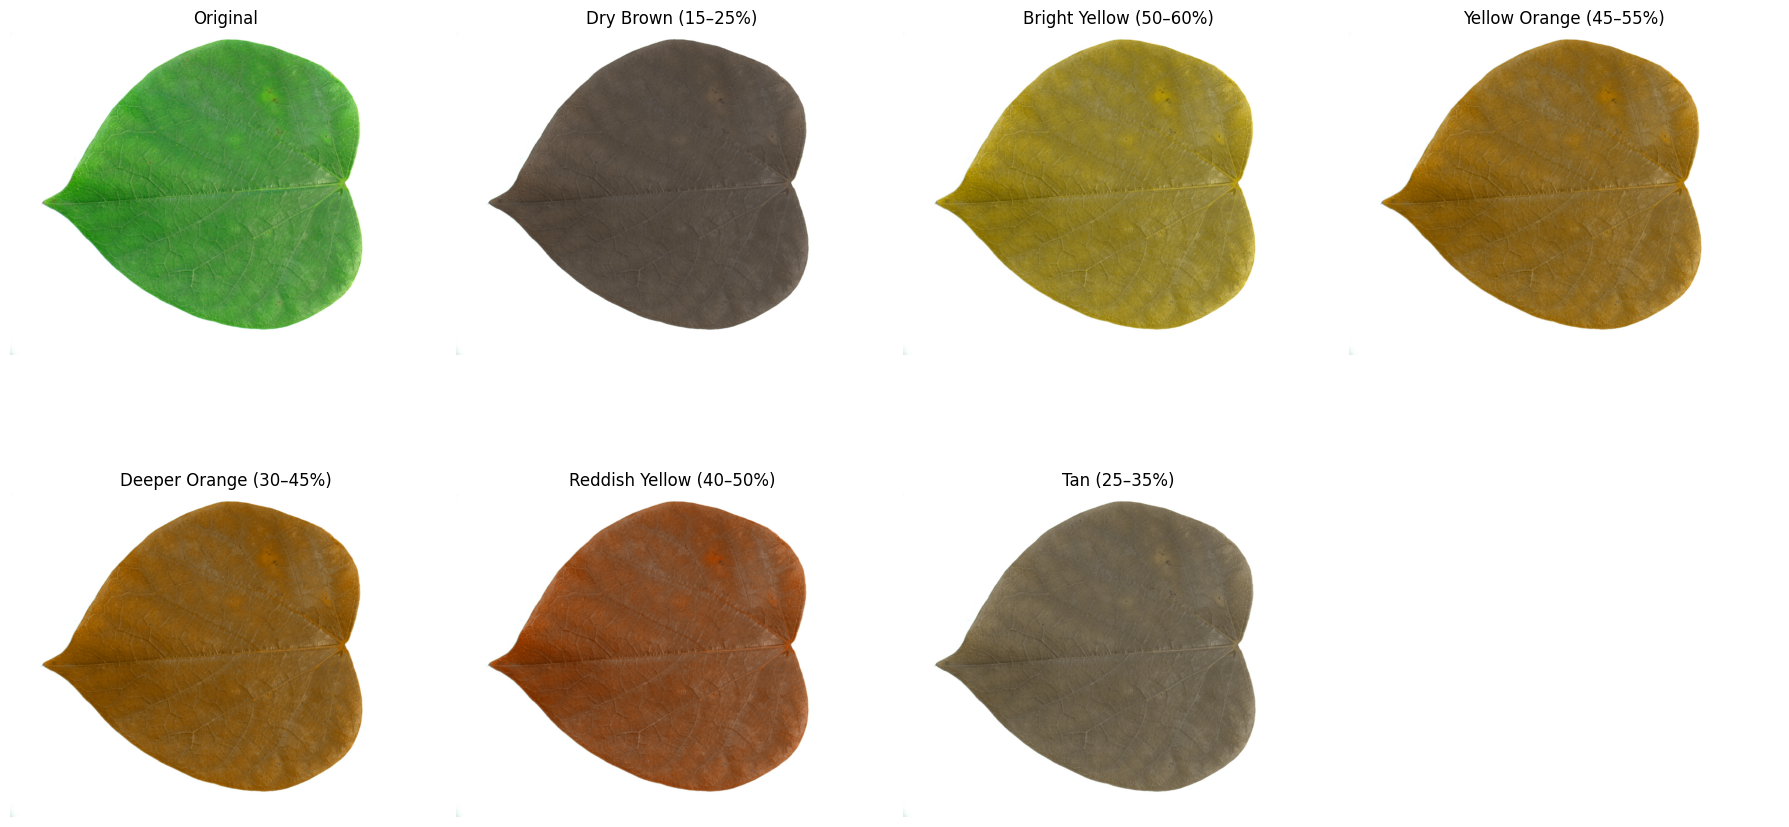

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Leaf transformation function
def transform_leaf(image, hue, sat_scale, val_scale):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green range
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas and convert to HSV
    green_areas = cv2.bitwise_and(image, image, mask=mask)
    hsv_leaf = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)

    # Modify hue, saturation, value
    hsv_leaf[..., 0] = hue
    hsv_leaf[..., 1] = np.clip(hsv_leaf[..., 1] * sat_scale, 0, 255)
    hsv_leaf[..., 2] = np.clip(hsv_leaf[..., 2] * val_scale, 0, 255)

    modified_leaf = cv2.cvtColor(hsv_leaf, cv2.COLOR_HSV2BGR)

    # Combine with background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, modified_leaf)

    return final_image

# Step 5: Define stages with HSV transform and moisture level
leaf_stages = {
    "Dry Brown (15–25%)":      (15, 0.4, 0.6),
    "Bright Yellow (50–60%)":  (25, 1.2, 1.0),
    "Yellow Orange (45–55%)":  (20, 1.3, 0.95),
    "Deeper Orange (30–45%)":  (18, 1.4, 0.9),
    "Reddish Yellow (40–50%)": (12, 1.2, 0.9),
    "Tan (25–35%)":            (20, 0.5, 0.75)
}

# Step 6: Process each stage
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Image not read.")
else:
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 10))
    plt.subplot(2, 4, 1)
    plt.title("Original")
    plt.imshow(orig_rgb)
    plt.axis("off")

    for idx, (stage, (h, s, v)) in enumerate(leaf_stages.items(), start=2):
        result = transform_leaf(image, hue=h, sat_scale=s, val_scale=v)
        rgb_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

        # Display result
        plt.subplot(2, 4, idx)
        plt.title(stage)
        plt.imshow(rgb_result)
        plt.axis("off")

        # Save file
        out_name = f"{stage.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('–', '_')}.png"
        cv2.imwrite(out_name, result)

    plt.tight_layout()
    plt.show()

    # Download all generated images
    for stage in leaf_stages:
        out_name = f"{stage.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('–', '_')}.png"
        files.download(out_name)


In [ ]:
pip install opencv-python numpy scikit-image torch torchvision torchaudio torch-geometric pyserial matplotlib pandas networkx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.

In [ ]:
import os

# NOTE: Before running, ensure your Colab notebook is saved to Google Drive (File > Save a copy in Drive).
# Then, navigate to the directory where your notebook is saved.
# This example assumes you are in the root of your Colab environment or the parent directory of your notebook.

# Step 1: Clone the repository (if it doesn't exist) or navigate into it
repo_url = "https://github.com/Dhivyaa12/leaf-color-conversion-.git"
repo_name = repo_url.split('/')[-1].replace('.git', '')

if not os.path.exists(repo_name):
    print(f"Cloning {repo_name}...")
    !git clone {repo_url}
    %cd {repo_name}
else:
    print(f"Repository {repo_name} already exists. Navigating into it.")
    %cd {repo_name}
    !git pull # Get latest changes

# Step 2: Configure Git user name and email (replace with your info)
!git config user.name "Your GitHub Username"
!git config user.email "your_email@example.com"

# Step 3: Copy your notebook and any output files into the repository directory
# This assumes your notebook is in the parent directory or a known path.
# You might need to adjust the source path to your actual .ipynb file location.

# Example for current notebook (replace 'Your_Notebook_Name.ipynb' with the actual filename)
# If you saved your notebook, it would be in /content/Your_Notebook_Name.ipynb typically.
# You can also use !ls /content to find your notebook name.
notebook_filename = "your_colab_notebook.ipynb" # <--- IMPORTANT: Replace with your actual notebook name

# If you have other output files generated, list them here:
output_files = [
    "dry_leaf_result.png",
    "yellow_leaf_result.png",
    "orange_yellow_leaf.png",
    "deep_orange_leaf.png",
    "tan_dry_leaf.png",
    "reddish_yellow_leaf.png",
    # Add other generated files if applicable
    "drying_stages", # Example for a folder
    "converted_leaf_images.zip" # Example for a zip file
]

# Copy the notebook file
if os.path.exists(f"/content/{notebook_filename}"):
    !cp /content/{notebook_filename} .
    print(f"Copied {notebook_filename} into the repository.")
else:
    print(f"Warning: {notebook_filename} not found in /content. Please adjust path or filename if you want to push your notebook.")

# Copy other generated files/folders
for item in output_files:
    if os.path.exists(f"/content/{item}"):
        if os.path.isdir(f"/content/{item}"):
            !cp -r /content/{item} .
            print(f"Copied directory {item} into the repository.")
        else:
            !cp /content/{item} .
            print(f"Copied {item} into the repository.")
    else:
        print(f"Warning: Generated file/directory {item} not found in /content. Skipping.")

# Step 4: Stage all changes
!git add .

# Step 5: Commit changes
commit_message = "Update code and add generated images from Colab"
!git commit -m "{commit_message}"

# Step 6: Push to GitHub
# You will be prompted to enter your GitHub username and Personal Access Token (PAT).
# Enter your PAT as the password when prompted.
!git push origin main # Or 'master' if that's your default branch

print("\n🚀 Push attempt complete! Check your GitHub repository for updates.")


Cloning leaf-color-conversion-...
Cloning into 'leaf-color-conversion-'...
/content/leaf-color-conversion-/leaf-color-conversion-
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Dhivyaa12/leaf-color-conversion-.git'

🚀 Push attempt complete! Check your GitHub repository for updates.


In [ ]:
# Step 1: Install required packages, ensuring scikit-image is included
!pip install opencv-python-headless numpy scikit-image matplotlib

# Step 2: Import libraries
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops # Import explicitly
from matplotlib import pyplot as plt

# Function to extract color features (as in the original code)
def extract_color_features(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mean = np.mean(hsv, axis=(0, 1))      # Average H, S, V
    std = np.std(hsv, axis=(0, 1))        # Std H, S, V
    return np.concatenate([mean, std])

# Function to extract texture features (as in the original code)
def extract_texture_features(img_gray):
    # Ensure img_gray is uint8 type for greycomatrix
    img_gray_uint8 = img_gray.astype(np.uint8)
    glcm = greycomatrix(img_gray_uint8, [1], [0], 256, symmetric=True, normed=True)
    props = ['contrast', 'correlation', 'energy', 'homogeneity']
    features = [greycoprops(glcm, p)[0, 0] for p in props]
    return np.array(features)

# Function to extract all features (as in the original code)
def extract_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not read image at {image_path}")
        return None # Return None if image reading fails

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Check if the grayscale image is empty or has no data
    if img_gray is None or img_gray.size == 0:
        print(f"Warning: Grayscale image is empty for {image_path}")
        return None

    color_feat = extract_color_features(img)

    # Check if grayscale image has sufficient data for GLCM
    if img_gray.shape[0] < 2 or img_gray.shape[1] < 2:
         print(f"Warning: Image too small for GLCM calculation for {image_path}")
         # You might return features without texture or handle differently
         return color_feat # Return only color features if texture cannot be computed


    texture_feat = extract_texture_features(img_gray)
    # moisture proxy: how dry it looks = low saturation & brightness
    moisture_proxy = [np.mean(img_gray)/255]
    return np.concatenate([color_feat, texture_feat, moisture_proxy])

# Example usage (you might need to adapt this based on how you use extract_features)
# For demonstration, let's assume you have an image file named 'test_image.png'
# Create a dummy image for testing if needed
# from PIL import Image
# img = Image.new('RGB', (60, 30), color = 'red')
# img.save('test_image.png')

# # Call the function with a dummy image path
# features = extract_features('test_image.png')
# if features is not None:
#     print("Extracted features:", features)
# else:
#     print("Feature extraction failed.")

ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (/usr/local/lib/python3.11/dist-packages/skimage/feature/__init__.py)

In [ ]:
# Step 1: Install required packages, ensuring scikit-image is included
!pip install opencv-python-headless numpy scikit-image matplotlib

# Step 2: Import libraries
import cv2
import numpy as np
# Import greycomatrix and greycoprops from the texture submodule
from skimage.feature.texture import greycomatrix, greycoprops
from matplotlib import pyplot as plt

# Function to extract color features (as in the original code)
def extract_color_features(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mean = np.mean(hsv, axis=(0, 1))      # Average H, S, V
    std = np.std(hsv, axis=(0, 1))        # Std H, S, V
    return np.concatenate([mean, std])

# Function to extract texture features (as in the original code)
def extract_texture_features(img_gray):
    # Ensure img_gray is uint8 type for greycomatrix
    img_gray_uint8 = img_gray.astype(np.uint8)
    glcm = greycomatrix(img_gray_uint8, [1], [0], 256, symmetric=True, normed=True)
    props = ['contrast', 'correlation', 'energy', 'homogeneity']
    features = [greycoprops(glcm, p)[0, 0] for p in props]
    return np.array(features)

# Function to extract all features (as in the original code)
def extract_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not read image at {image_path}")
        return None # Return None if image reading fails

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Check if the grayscale image is empty or has no data
    if img_gray is None or img_gray.size == 0:
        print(f"Warning: Grayscale image is empty for {image_path}")
        return None

    color_feat = extract_color_features(img)

    # Check if grayscale image has sufficient data for GLCM
    if img_gray.shape[0] < 2 or img_gray.shape[1] < 2:
         print(f"Warning: Image too small for GLCM calculation for {image_path}")
         # You might return features without texture or handle differently
         return color_feat # Return only color features if texture cannot be computed


    texture_feat = extract_texture_features(img_gray)
    # moisture proxy: how dry it looks = low saturation & brightness
    moisture_proxy = [np.mean(img_gray)/255]
    return np.concatenate([color_feat, texture_feat, moisture_proxy])

# Example usage (you might need to adapt this based on how you use extract_features)
# For demonstration, let's assume you have an image file named 'test_image.png'
# Create a dummy image for testing if needed
# from PIL import Image
# img = Image.new('RGB', (60, 30), color = 'red')
# img.save('test_image.png')

# # Call the function with a dummy image path
# features = extract_features('test_image.png')
# if features is not None:
#     print("Extracted features:", features)
# else:
#     print("Feature extraction failed.")

ImportError: cannot import name 'greycomatrix' from 'skimage.feature.texture' (/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py)

Saving almond dry.jpg to almond dry.jpg


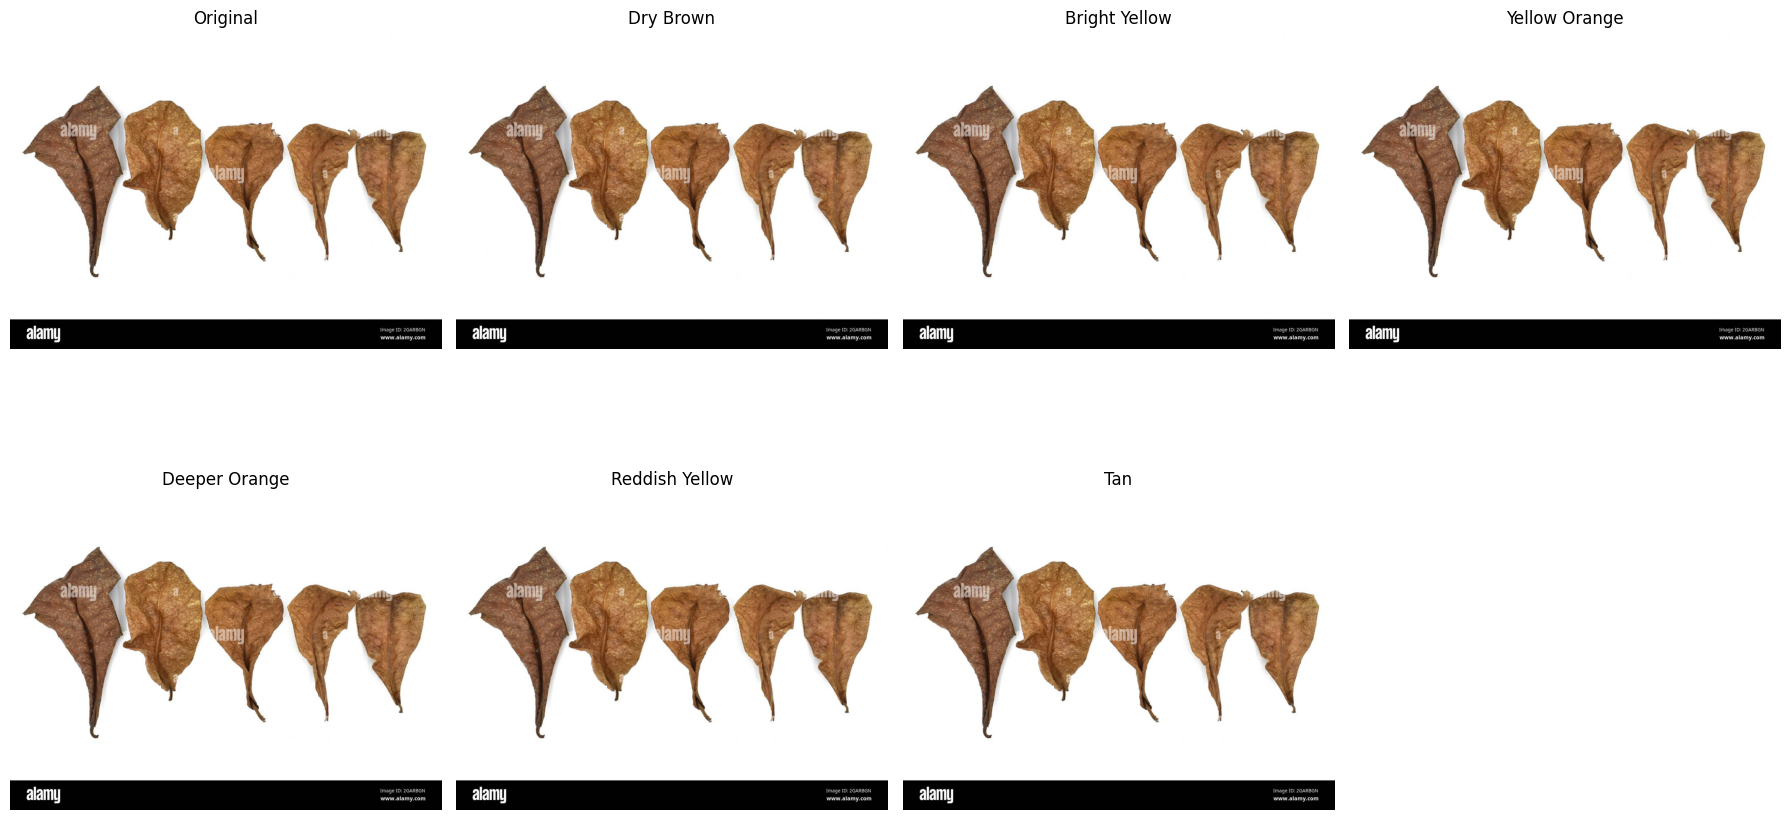

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Leaf stage transformation function
def transform_leaf(image, hue, sat_scale, val_scale, stage_name):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green range
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_inv = cv2.bitwise_not(mask)

    # Extract green areas
    green_areas = cv2.bitwise_and(image, image, mask=mask)
    hsv_leaf = cv2.cvtColor(green_areas, cv2.COLOR_BGR2HSV)

    # Adjust hue, saturation, brightness
    hsv_leaf[..., 0] = hue
    hsv_leaf[..., 1] = np.clip(hsv_leaf[..., 1] * sat_scale, 0, 255)
    hsv_leaf[..., 2] = np.clip(hsv_leaf[..., 2] * val_scale, 0, 255)

    modified_leaf = cv2.cvtColor(hsv_leaf, cv2.COLOR_HSV2BGR)

    # Combine with background
    background = cv2.bitwise_and(image, image, mask=mask_inv)
    final_image = cv2.add(background, modified_leaf)

    return final_image

# Step 5: Define color stage parameters
leaf_stages = {
    "Dry Brown":       (15, 0.4, 0.6),
    "Bright Yellow":   (25, 1.2, 1.0),
    "Yellow Orange":   (20, 1.3, 0.95),
    "Deeper Orange":   (18, 1.4, 0.9),
    "Reddish Yellow":  (12, 1.2, 0.9),
    "Tan":             (20, 0.5, 0.75)
}

# Step 6: Process each stage
image = cv2.imread(filename)
if image is None:
    print("❌ Error: Image not read.")
else:
    orig_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 10))
    plt.subplot(2, 4, 1)
    plt.title("Original")
    plt.imshow(orig_rgb)
    plt.axis("off")

    for idx, (name, (h, s, v)) in enumerate(leaf_stages.items(), start=2):
        result = transform_leaf(image, hue=h, sat_scale=s, val_scale=v, stage_name=name)
        rgb_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

        # Display
        plt.subplot(2, 4, idx)
        plt.title(name)
        plt.imshow(rgb_result)
        plt.axis("off")

        # Save file
        out_name = f"{name.lower().replace(' ', '_')}_leaf.png"
        cv2.imwrite(out_name, result)

    plt.tight_layout()
    plt.show()

    # Download files
    for name in leaf_stages:
        out_name = f"{name.lower().replace(' ', '_')}_leaf.png"
        files.download(out_name)
